In [34]:
import warnings

import numpy as np
import matplotlib.pyplot as plt

from PyDynamic.misc import impinvar
from scipy import signal
from scipy.io import wavfile

warnings.filterwarnings('ignore')

1. Design a linear phase using Hamming, Hann, Blackman and Kaiser windows with the following specifications.
  * A. Stopband edge frequencies @ 0.4𝜋 and 0.85 𝜋
  * B. Passband edges @ 0.6 𝜋 and 0.77 𝜋
  * C. Maximum passband attenuation -- 0.11dB
  * D. Minimum stop band attenuation – 42dB

*Plot the magnitude response of the designed filters. Show the impulse response
coefficients as well*

### Specification
* $ \omega_{s1} = 0.4\pi $
* $ \omega_{p1} = 0.6\pi $
* $ \omega_{s2} = 0.85\pi $
* $ \omega_{p2}  = 0.77\pi $
* $ R_p = 0.11dB $
* $ A_s = 42dB $

### Solution

$ \omega_{c1} = \frac{\omega_{p1} + \omega_{s1}}{2} = 0.5\pi $

$ \omega_{c2} = \frac{\omega_{p2} + \omega_{s2}}{2} = 0.81\pi $

$ \Delta\omega = min|(\omega_{s1} - \omega_{p1}), (\omega_{p2} - \omega_{s2})| = 0.08\pi$

$ h_d(n) = \frac{sin[\omega_{c2}(n - \alpha)]}{\pi(n - \alpha)} + \frac{sin[\omega_{c1}(n - \alpha)]}{\pi(n - \alpha)} $

$ h_d(n) = \frac{sin[o.81\pi(n - \alpha)]}{\pi(n - \alpha)} + \frac{sin[0.5\pi(n - \alpha)]}{\pi(n - \alpha)} $





In [4]:
# Stopband edge frequencies 

ws_1 = 0.4 * np.pi # 𝜔s1
ws_2 = 0.85 * np.pi # 𝜔s1

# Passband edges frequencies

wp_1 = 0.6 * np.pi # 𝜔p1
wp_2 = 0.77 * np.pi # 𝜔p2

# Maximum passband attenuation
Rp = 0.11

# Minimum stop band attenuation
As = 42

In [5]:
# Cutoff frequencies
wc_1 = np.average([wp_1, ws_1]) # 𝜔𝑐1
wc_2 = np.average([wp_2, wp_2]) # 𝜔𝑐2

# Transition width Δ𝜔
width_t = np.min([(wp_1 - ws_1), (ws_2 - wp_2)])

# **Hamming Window**
The Hamming window is a taper formed by using a raised cosine with non-zero endpoints, optimized to minimize the nearest side lobe.

for Hamming window $ \Delta\omega =  \frac{6.6\pi}{N}$, then $ N = 83$, and $ \alpha = \frac{N - 1}{2} = 44$

Computer the impulse response of the design filter

$ w(n) = 0.54 - 0.46 cos(\frac{\pi n}{N-1})$

$ w(n) = 0.54 - 0.46 cos(\frac{\pi n}{82})$

$ h(n) = h_d(n)w(n) $

In [6]:
# The window length
N = np.ceil((6.6 * np.pi) / width_t) + 1

# Number of taps
n = np.arange(N)

alpha = (N - 1) / 2 

hd_1 = np.sin(wc_1 * (n - alpha)) / (np.pi * (n - alpha))
hd_2 = np.sin(wc_2 * (n - alpha)) / (np.pi * (n - alpha))
hd = hd_2 - hd_1

# Create Hamming Window Function using the order N
window = np.hamming(N).transpose()
H = window * hd

# Compute the frequency response of a digital filter.
w, h = signal.freqz(H, [1], 1000, whole=True) 

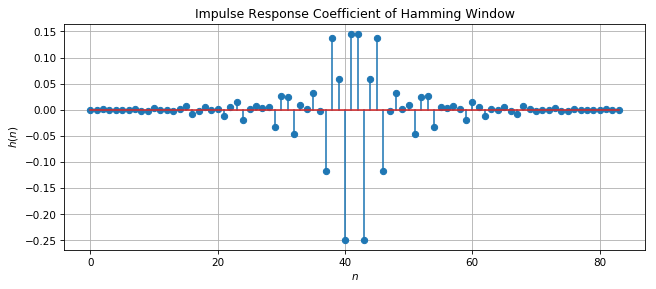

In [7]:
# Impulse Response Coefficient of hamming
plt.figure(figsize=(10, 4), dpi=75)
plt.title("Impulse Response Coefficient of Hamming Window")
plt.xlabel(r'$n$'); 
plt.ylabel(r"$h(n)$")
plt.stem(n, H)
plt.grid()
plt.show()

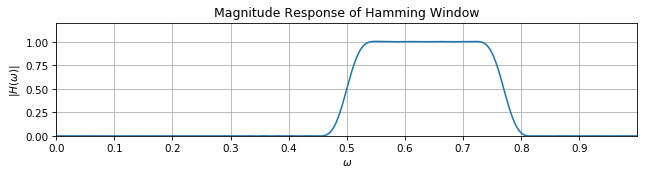

In [8]:
plt.figure(figsize=(10, 2), dpi=75)
plt.plot(w / np.pi, np.abs(h))
plt.title("Magnitude Response of Hamming Window")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$|H(\omega)|$")
plt.axis([0, 1, 0, 1.2])
plt.xticks(np.arange(0, 1, 0.1))
plt.grid()
plt.show()

# **Hanning Window**
The Hanning window is a taper formed by using a weighted cosine.

for Hanning window $ \Delta\omega =  \frac{6.2\pi}{N}$, then $ N = 75$, and $ \alpha = \frac{N - 1}{2} = 37 $

Computer the impulse response of the design filter

$ w(n) = 0.5 - 0.5 cos(\frac{\pi n}{N-1})$

$ w(n) = 0.5 - 0.5 cos(\frac{\pi n}{75})$

$ h(n) = h_d(n)w(n) $

In [9]:
# The window length
N = np.ceil((6.2 * np.pi) / width_t)

# Number of taps
n = np.arange(N)

alpha = (N - 1) / 2

hd_1 = np.sin(wc_1 * (n - alpha)) / (np.pi * (n - alpha))
hd_2 = np.sin(wc_2 * (n - alpha)) / (np.pi * (n - alpha))
hd = hd_2 - hd_1

window = np.hanning(N).transpose()
H = window * hd

w, h = signal.freqz(H, [1], 1000, whole=True)

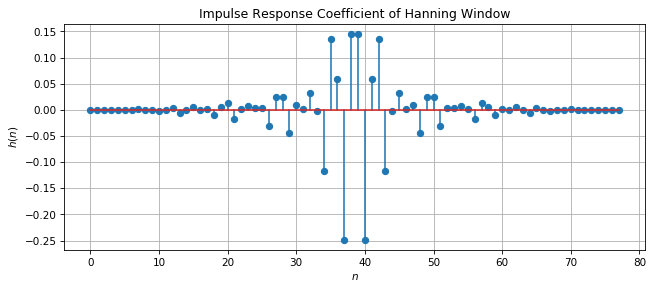

In [10]:
# Impulse Response Coefficient of hanning
plt.figure(figsize=(10, 4), dpi=75)
plt.title("Impulse Response Coefficient of Hanning Window")
plt.xlabel(r'$n$'); 
plt.ylabel(r"$h(n)$")
plt.stem(n, H)
plt.grid()
plt.show()

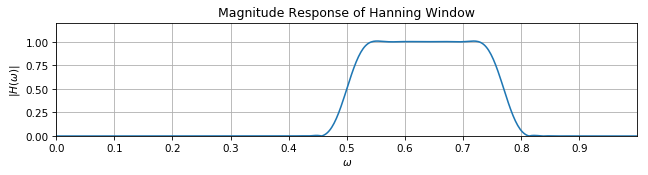

In [11]:
plt.figure(figsize=(10, 2), dpi=75)
plt.plot(w / np.pi, np.abs(h))
plt.title("Magnitude Response of Hanning Window")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$|H(\omega)|$")
plt.axis([0, 1, 0, 1.2])
plt.xticks(np.arange(0, 1, 0.1))
plt.grid()
plt.show()

# **Kaiser**
The Kaiser window is a taper formed by using a Bessel function.

for Kaiser window $N = \frac{A_s - 7.95}{14.36\Delta f} = 60, \alpha = 30 \hspace{1cm} \Delta f = \frac{\Delta\omega}{2\pi}$

Computer the impulse response of the design filter

$ w(n) = I_0\left(\beta\sqrt{1 - \frac{4n^2}{(N -1)^2}} \right)/I_0\beta \hspace{1cm} with -\frac{N-1}{2} \le n \le \frac{N - 1}{2}$

$ \beta = 0.5843(A_s - 21)^{0.4} + 0.07886(A_s - 21)$

$ h(n) = h_d(n)w(n) $

In [12]:
# The window length
N = np.ceil((As - 7.95) / (14.36 * (width_t / (2 * np.pi))))

# Number of taps
n = np.arange(N)
beta = 0.5842 * (As - 21)**0.4 + 0.07886*(As - 21)
alpha = (N - 1) / 2

hd_1 = np.sin(wc_1 * (n - alpha)) / (np.pi * (n - alpha))
hd_2 = np.sin(wc_2 * (n - alpha)) / (np.pi * (n - alpha))
hd = hd_2 - hd_1

window = np.kaiser(N, beta).transpose()
H = window * hd

w, h = signal.freqz(H, [1], 1000, whole=True)

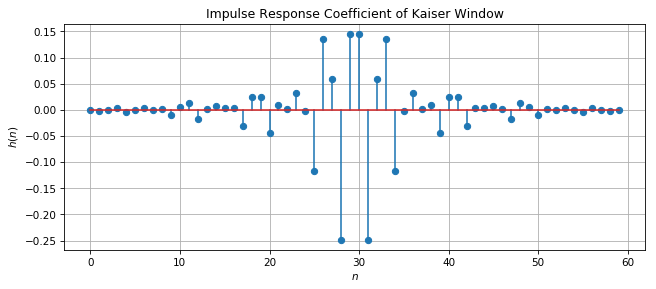

In [13]:
plt.figure(figsize=(10, 4), dpi=75)
plt.title("Impulse Response Coefficient of Kaiser Window")
plt.xlabel(r'$n$'); 
plt.ylabel(r"$h(n)$")
plt.stem(n, H)
plt.grid()
plt.show()

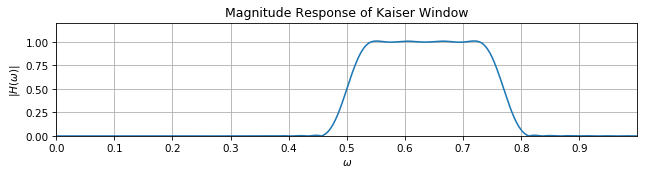

In [14]:
plt.figure(figsize=(10, 2), dpi=75)
plt.plot(w / np.pi, np.abs(h))
plt.title("Magnitude Response of Kaiser Window")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$|H(\omega)|$")
plt.axis([0, 1, 0, 1.2])
plt.xticks(np.arange(0, 1, 0.1))
plt.grid()
plt.show()

# **Blackman**
The Blackman window is a taper formed by using the first three terms of a summation of cosines. It was designed to have close to the minimal leakage possible. It is close to optimal, only slightly worse than a Kaiser window.

for Blackman window $ \Delta\omega =  \frac{11\pi}{N}$, then $ N = 138$, and $ \alpha = \frac{N - 1}{2} = 69 $

Computer the impulse response of the design filter

$ w(n) = 0.42 - 0.5 cos(\frac{2\pi n}{N}) + 0.08cos(\frac{4\pi n}{N})$

$ h(n) = h_d(n)w(n) $

In [15]:
# The window length
N = np.ceil((11 * np.pi) / width_t)

# Number of taps
n = np.arange(N)

alpha = (N - 1) / 2

hd_1 = np.sin(wc_1 * (n - alpha)) / (np.pi * (n - alpha))
hd_2 = np.sin(wc_2 * (n - alpha)) / (np.pi * (n - alpha))
hd = hd_2 - hd_1

window = np.blackman(N).transpose()
H = window * hd

w, h = signal.freqz(H, [1], 1000, whole=True)

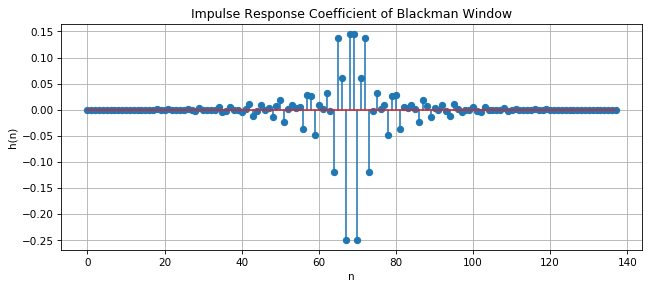

In [16]:
# Impulse Response Coefficient of Blackman window
plt.figure(figsize=(10, 4), dpi=75)
plt.title("Impulse Response Coefficient of Blackman Window")
plt.xlabel('n'); 
plt.ylabel("h(n)")
plt.stem(n, H)
plt.grid()
plt.show()

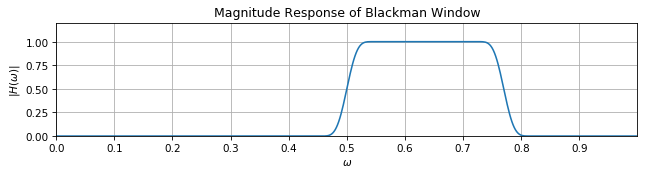

In [17]:
plt.figure(figsize=(10, 2), dpi=75)
plt.plot(w / np.pi, np.abs(h))
plt.title("Magnitude Response of Blackman Window")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$|H(\omega)|$")
plt.axis([0, 1, 0, 1.2])
plt.xticks(np.arange(0, 1, 0.1))
plt.grid()
plt.show()

---
**2**. Design a digital Type I Chebyshev lowpass filter operating at a sampling rate of 80KHz with a pass edge frequency at 4KHz, a passband ripple of 0.5dB, and a minimum stopband attenuation of 45dB at 20kHz using the impulse invariance method and the bilinear transformation method.
 * A. Determine the order of the analog prototype and design the analog filter
 * B. Transform the analog filter transfer function to the desired digital transfer function using the two methods
 * C. Plot the gain and phase response of both designs
 * D. Take a recording of a speech signal and apply it to the filters designed and comment on the effect of the filters on the output signal. Show the frequency domain plot of the input and output signals.


### **Given**
* $ f_{sample} = 80KHz $
* $ \Omega_{p} = 4KHz $
* $ \Omega_{s} = 20KHz $
* $ R_p = 0.5dB $
* $ A_s = 45dB $

### **Solution**
**Chebyshev** filters are analog or digital filters having a steeper roll-off than Butterworth filters, and have passband ripple (Type I) or stopband ripple (Type II). Chebyshev filters have the property that they minimize the error between the idealized and the actual filter characteristic over the range of the filter, but with ripples in the passband. This type of filter is named after Pafnuty Chebyshev because its mathematical characteristics are derived from Chebyshev polynomials. Type I Chebyshev filters are usually referred to as "Chebyshev filters", while type II filters are usually called "inverse Chebyshev filters". Because of the passband ripple inherent in Chebyshev filters, filters with a smoother response in the passband but a more irregular response in the stopband are preferred for certain applications.

In [18]:
Fs = 80_000 # Sampling rate 80KHz
Ws = 2 * np.pi * 20_000 # Stop edge frequency
Wp = 2 * np.pi * 4_000 # pass edge frequency
Rp = 0.5 # passband riple 
As = 45 # stopband attenuation
Td = 1/Fs # Design Sampling parameter


**A**) Determine the order of the analog prototype and design the analog filter


Given $ Ω_p, Ω_s, R_p, $ and $ A_S $ , three parameters are required to determine
a Chebyshev-I filter: $\epsilon , \Omega_c, N$


$ \epsilon = \sqrt{10^{0.1R_p} - 1} = 0.3493, \hspace{1cm} A = 10^{{A_s}/{20}} = 177.8279$

From these properties, we have

$ \Omega_c = \Omega_p  \hspace{1cm} and \hspace{1cm} \Omega_r = \frac{\Omega_s}{\Omega_p} = 5$

The order N is given by

$ g = \sqrt{(A^2 - 2)/\epsilon^2} = 509.07336$

$ N = \left[ \frac{\log_{10}\left[g + \sqrt{g^2 - 1} \right]}{\log_{10}\left[\Omega_r + \sqrt{\Omega_r^2 - 1} \right]} \right] = 4$

In [19]:
ep = np.sqrt(10**(Rp / 10) - 1) # ε
A = 10 ** (As / 20)

g = np.sqrt(A*A - 1) / ep

# Prewarp the analog frequency
Wc = (2 / Td ) *np.tan(Wp * Td/2)
Wr = Ws / Wp

N = np.ceil(np.log10(g + np.sqrt(g**2 - 1)) / np.log10(Wr + np.sqrt(Wr**2 - 1)))

# Nth-order Chebyshev type I analog lowpass filter
ob, oa = signal.cheby1(N, Rp, Wc, analog=True, output='ba')
b, a = signal.normalize(ob, oa)

w, h = signal.freqs(b, a)

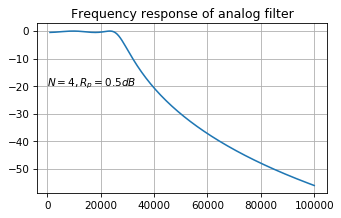

In [20]:
plt.figure(figsize=(5, 3), dpi=75)
plt.title("Frequency response of analog filter")
plt.text(0, -20, r"$ N = 4, R_p = 0.5dB $")
plt.plot(w, 20 * np.log10(np.abs(h)))
plt.grid()
plt.show()

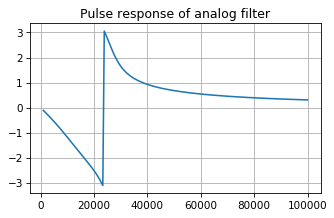

In [21]:
plt.figure(figsize=(5, 3), dpi=75)
plt.title("Pulse response of analog filter")
plt.plot(w, np.angle(h))
plt.grid()
plt.show()

**B**) Transform the analog filter transfer function to the desired digital transfer function using the two methods


In [22]:
# Billiar Transform
z, p = signal.bilinear(b, a, fs=Fs)
wb, hb = signal.freqz(z, p, 1000, whole=True)

# Impulse Invariance
i, j = impinvar(b, a, fs=Fs)
wi, hi = signal.freqz(i, j, 1000, whole=True)

**C**). Plot the gain and phase response of both designs

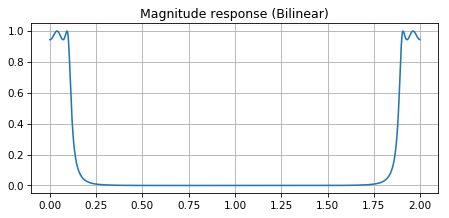

In [23]:
# Gain Response (Bilinear)
plt.figure(figsize=(7, 3), dpi=75)
plt.plot(wb / np.pi, np.abs(hb))
plt.title("Magnitude response (Bilinear)")
plt.grid()
plt.show()

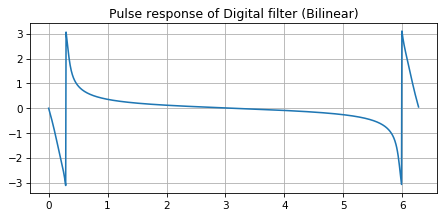

In [24]:
plt.figure(figsize=(7, 3), dpi=75)
plt.plot(wb, np.angle(hb))
plt.title("Pulse response of Digital filter (Bilinear)")
plt.grid()
plt.show()

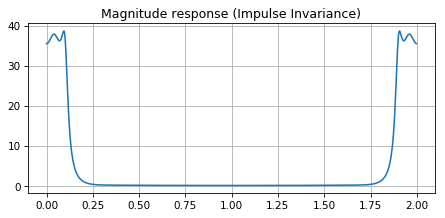

In [25]:
plt.figure(figsize=(7, 3), dpi=75)
plt.plot(wi / np.pi , abs(hi))
plt.title("Magnitude response (Impulse Invariance)")
plt.grid()
plt.show()

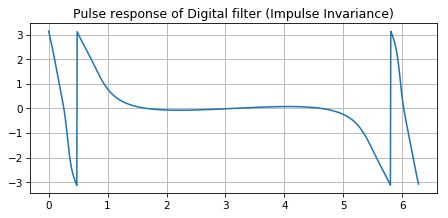

In [26]:
plt.figure(figsize=(7, 3), dpi=75)
plt.plot(wi, np.angle(hi))
plt.title("Pulse response of Digital filter (Impulse Invariance)")
plt.grid()
plt.show()

**D**). Take a recording of a speech signal and apply it to the filters designed and comment on the effect of the filters on the output signal. Show the frequency domain plot of the input and output signals.

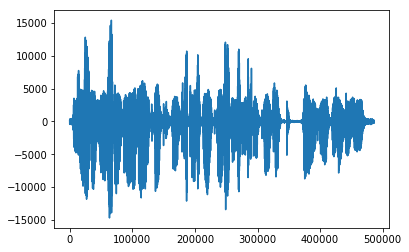

In [35]:
rate, sig = wavfile.read('./sample_audio.wav')
plt.plot(sig)

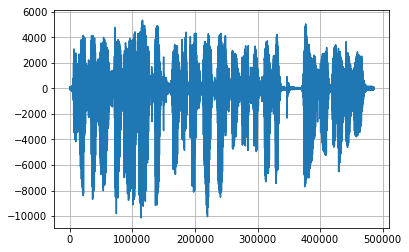

In [40]:
yb = signal.filtfilt(z, p, sig.real)
plt.plot(yb)
plt.grid()
plt.show()

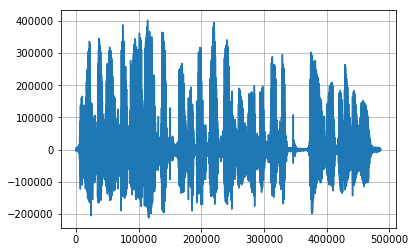

In [39]:
yi = signal.lfilter(i, j, sig.real)
plt.plot(yi)
plt.grid()
plt.show()

In [33]:
wavfile.write('bilinear_filtered.wav', rate, yb)
wavfile.write('impinvar_filtered.wav', rate, yi)